In [1]:
pip install yfinance

Task 1:Solution

In [74]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Retrieving the data
data = pdr.get_data_yahoo("AMZN", start="2022-01-01", end="2022-12-31")

# Printing the data
print(data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
...                ...         ...         ...         ...         ...   
2022-12-23   83.250000   85.779999   82.930000   85.250000   85.250000   
2022-12-27   84.970001   85.349998   83.000000   83.040001   83.040001   
2022-12-28   82.800003   83.480003   81.690002   81.820000   81.820000   
2022-12-29   82.870003   84.550003   82.550003   84.180000   84.180000   
2022-12-30   83.120003   84.050003   82.470

Task 2:Solution

In [75]:
# Identifing missing values
missing = data.isnull()

# Replacing missing values with the mean or median
data.fillna(data.mean(), inplace=True)

# Removing unnecessary columns
data.drop(columns=['Open', 'High', 'Low', 'Close'], inplace=True)

# Printing the cleaned data
print(data)

             Adj Close    Volume
Date                            
2022-01-03  170.404495  63520000
2022-01-04  167.522003  70726000
2022-01-05  164.356995  64302000
2022-01-06  163.253998  51958000
2022-01-07  162.554001  46606000
...                ...       ...
2022-12-23   85.250000  57433700
2022-12-27   83.040001  57284000
2022-12-28   81.820000  58228600
2022-12-29   84.180000  54995900
2022-12-30   84.000000  62330000

[251 rows x 2 columns]


Task 3:Solution

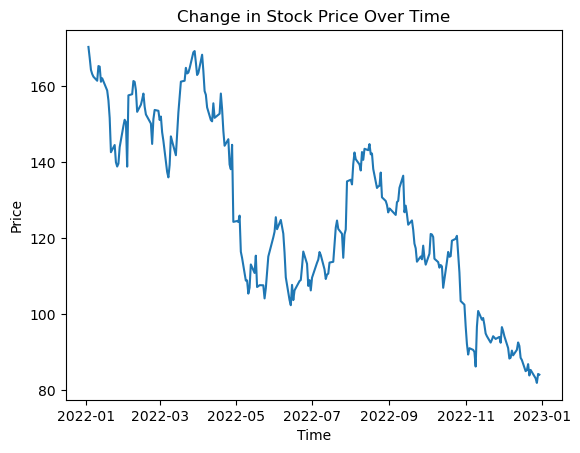

In [76]:
import matplotlib.pyplot as plt
# Ploting the stock price over time
plt.plot(data['Adj Close'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Change in Stock Price Over Time')
plt.show()

In [77]:
print(data.columns)

Index(['Adj Close', 'Volume'], dtype='object')


In [78]:
data = data.reset_index()

In [79]:
data.head()

,Date,Adj Close,Volume
0,2022-01-03,170.404495,63520000
1,2022-01-04,167.522003,70726000
2,2022-01-05,164.356995,64302000
3,2022-01-06,163.253998,51958000
4,2022-01-07,162.554001,46606000


Task 4:Solution

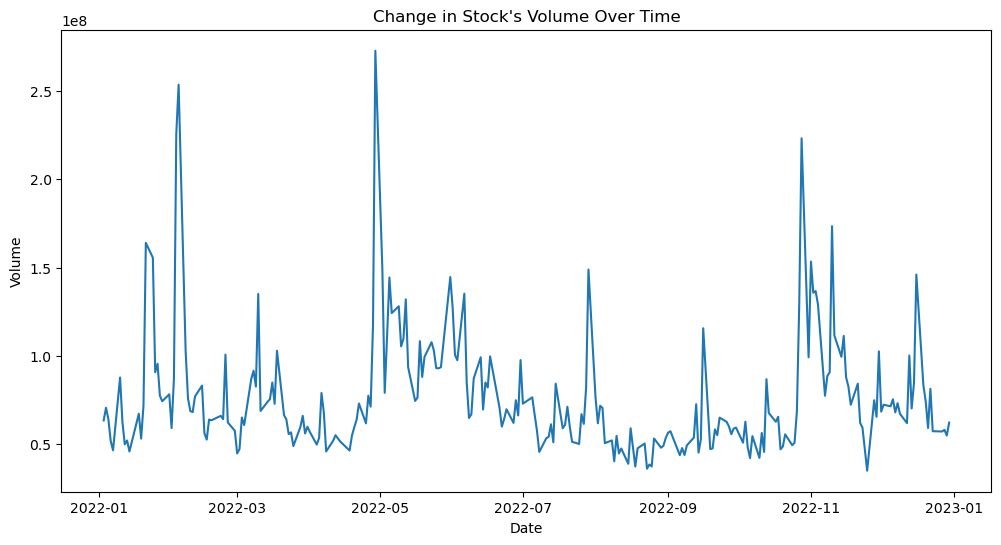

In [80]:
import seaborn as sns

# Ploting the volume being traded over time
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Volume"])
plt.title("Change in Stock's Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

Task 5:Solution

In [81]:
import pandas as pd

# Calculating the 50-day moving average
moving_average = data['Adj Close'].rolling(50).mean()

# Printing the moving average
print(moving_average)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
246    96.9226
247    96.4454
248    95.8060
249    95.1624
250    94.5410
Name: Adj Close, Length: 251, dtype: float64


Task 6:Solution

In [82]:
# Calculating the daily return
daily_return = data['Adj Close'].pct_change()

# Calculating the daily return average
avg_daily_return = daily_return.mean()

# Printing the daily return average
print(avg_daily_return)

-0.002329137756859738


Task 7:Solution

In [83]:
import numpy as np
data['Trend'] = np.where(data['Adj Close'].pct_change() > avg_daily_return, 'Up', 'Down')

In [84]:
data.head()

,Date,Adj Close,Volume,Trend
0,2022-01-03,170.404495,63520000,Down
1,2022-01-04,167.522003,70726000,Down
2,2022-01-05,164.356995,64302000,Down
3,2022-01-06,163.253998,51958000,Down
4,2022-01-07,162.554001,46606000,Down


Task 8:Solution

<AxesSubplot:title={'center':'Trend Frequency'}, ylabel='Trend'>

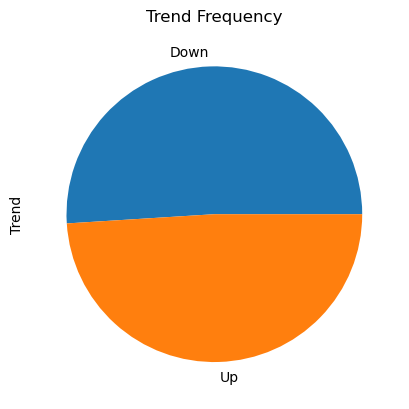

In [85]:
# Visualizing the trend frequency through a pie chart
data['Trend'].value_counts().plot.pie(title='Trend Frequency')

Task 9:Solution

In [65]:
data1 = pdr.get_data_yahoo("GOOG", start="2022-01-01", end="2022-12-31")
data2 = pdr.get_data_yahoo("AAPL", start="2022-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [66]:
print(data1)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  144.475494  145.550003  143.502502  145.074493  145.074493   
2022-01-04  145.550507  146.610001  143.816147  144.416504  144.416504   
2022-01-05  144.181000  144.298004  137.523499  137.653503  137.653503   
2022-01-06  137.497498  139.686005  136.763504  137.550995  137.550995   
2022-01-07  137.904999  138.254745  135.789001  137.004501  137.004501   
...                ...         ...         ...         ...         ...   
2022-12-23   87.620003   90.099998   87.620003   89.809998   89.809998   
2022-12-27   89.309998   89.500000   87.535004   87.930000   87.930000   
2022-12-28   87.500000   88.519997   86.370003   86.459999   86.459999   
2022-12-29   87.029999   89.364998   86.989998   88.949997   88.949997   
2022-12-30   87.364998   88.830002   87.029999   88.730003   88.730003   

              Volume  
Date          

In [67]:
print(data2)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.959732   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.663071   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.910660   
2022-01-06  172.699997  175.300003  171.639999  172.000000  171.007507   
2022-01-07  172.889999  174.139999  171.029999  172.169998  171.176544   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.860001   
2022-12-27  131.380005  131.410004  128.720001  130.029999  130.029999   
2022-12-28  129.669998  131.029999  125.870003  126.040001  126.040001   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.610001   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.929993   

               Volume  
Date         

In [69]:
# Calculating the daily return for each stock
daily_return_GOOG = data1['Adj Close'].pct_change()
daily_return_AAPL = data2['Adj Close'].pct_change()

# Calculating the correlation between the daily returns of the two stocks
correlation = daily_return_GOOG.corr(daily_return_AAPL)
print(correlation)

0.7905726211096279
